In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('C:/Users/valej/Desktop/DATA-765/HWs/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [12]:
categorical_features = ['purpose']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [13]:
X=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

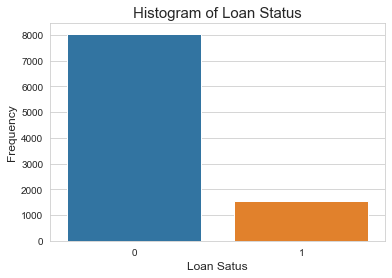

In [14]:
#description of target variable
sns.set_style('whitegrid')
sns.countplot(x='not.fully.paid',data=df)
plt.title("Histogram of Loan Status",fontsize=15)
plt.xlabel("Loan Satus",fontsize= 12)
plt.ylabel("Frequency",fontsize= 12);

### Training the Dataset

In [15]:
#Creating training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state= 123)

### Imbalanced categories in the "not.fully.paid" target variable
Machine learning models work better when the samples in each class/category are close to equal (balanced). The data I am using for this model has a large imbalace in the 'not.fully.paid' vector. 

There are a handful of methods to deal with imbalanced data, most of them rely on resampling techniques. Given that I have too many "Good" observation in the target variable I decided to **undersample the majority class** to match the minority class. In order to accomplish this successfully, I need to make sure I split my data first. For more information on how to deal with imbalanced data click [here.](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

#### Undersampling the majority class

In [16]:
from sklearn.utils import resample
#downsampling majority class
#concatenate our training data back together - AFTER SPLITTING
X = pd.concat([X_train, y_train], axis=1)
#separate minority and majority classes
default = X[X['not.fully.paid']==1]
good = X[X['not.fully.paid']==0]

good_downsampled = resample(good,
                            replace = False, # sample without replacement
                            n_samples = len(default), # match minority n
                            random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([good_downsampled,default])
downsampled['not.fully.paid'].value_counts()

1    1053
0    1053
Name: not.fully.paid, dtype: int64

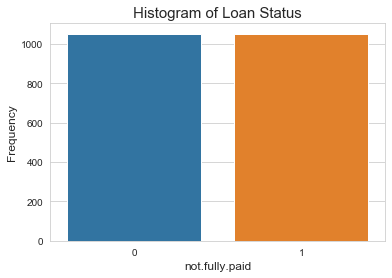

In [17]:
#description of target variable
sns.set_style('whitegrid')
sns.countplot(x='not.fully.paid',data=downsampled)
plt.title("Histogram of Loan Status",fontsize=15)
plt.xlabel("not.fully.paid",fontsize= 12)
plt.ylabel("Frequency",fontsize= 12);

### Redefining my features and target

In [18]:
df_final=downsampled
y_train = df_final['not.fully.paid'] #target var after rebalancing
X_train = df_final.drop('not.fully.paid',axis=1)#Features - explanatory vars
#Creating training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.3,random_state= 123)

### Creating the logistic regression model

In [19]:
model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

#### Coefficient Analysis
The closer the intercept number gets to zero, this means the log odds of a non-default is approaching zero

In [20]:
model.coef_

array([[-1.75167792e-04,  1.43258308e-05,  6.84930067e-04,
         1.06510458e-04,  1.22062297e-03, -8.01949745e-04,
        -2.85747123e-05,  3.79911903e-07,  8.53648811e-03,
         1.23780558e-03, -1.24099950e-06,  5.24302889e-05,
        -6.69059626e-05, -3.52126243e-05,  4.58589289e-05,
        -3.08553305e-06, -3.27438718e-06,  6.02122345e-05]])

In [21]:
model.intercept_

array([2.4114614e-05])

### Model Accuracy scoring
A simple way to analyse performance is with accuracy(number of correct prdictions/number of predictions). To calculate the accuracy I will use the score() method in the SciKit-Learn package. The method is applied to the trained model and it provides a percentage of correct predictions. 

In [22]:
model.score(X_test,y_test)

0.5537974683544303

The model predicted the default correctly 55% of the times.

### Predictions

In [23]:
model_pred=model.predict_proba(X_test)
model_pred

array([[0.5710509 , 0.4289491 ],
       [0.39571772, 0.60428228],
       [0.38566462, 0.61433538],
       ...,
       [0.61479554, 0.38520446],
       [0.63568886, 0.36431114],
       [0.48227859, 0.51772141]])

### Default Classification Report at a 50% Threshold
If the probability of default is greater than 50%, the prediction will be classified as "Default".

In [30]:
#Default Classification Reporting & setting threshold at .60
prob_default = pd.DataFrame(model_pred[:,1],columns=['Prob. of Default'])
#Reassigning a new loan status based on the probability of default being above .60
prob_default['loan_status_pred'] = prob_default['Prob. of Default'].apply(lambda x: 1 if x>.4 else 0)
prob_default['loan_status_pred'].value_counts()

1    537
0     95
Name: loan_status_pred, dtype: int64

In [25]:
print(classification_report(y_test, prob_default['loan_status_pred']))

              precision    recall  f1-score   support

           0       0.65      0.20      0.30       314
           1       0.53      0.90      0.67       318

    accuracy                           0.55       632
   macro avg       0.59      0.55      0.48       632
weighted avg       0.59      0.55      0.49       632



### Confusion Matrix

In [26]:
confusion_matrix(y_test,prob_default['loan_status_pred'])

array([[ 62, 252],
       [ 33, 285]], dtype=int64)

### Receiver Operating Characteristics(RCO) & Area Under the Curve (AUC)
In order to visualize the performance of the model, I created a ROC plot. I plotted the false posicive rate (x) and true positive rate (y). To calculate the area under the curve I used roc_auc_score(). \
For more information on AUC-ROC click [Here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

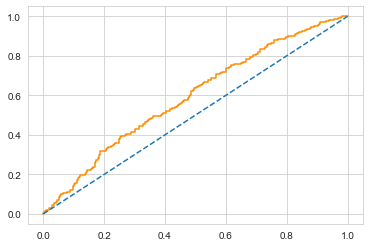

In [27]:
#plot
prob_default = model_pred[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color='darkorange')
plt.plot([0,1],[0,1], linestyle= '--')

In [28]:
auc=roc_auc_score(y_test,prob_default)
auc

0.5924568361174538

In [29]:
prob_default

array([0.4289491 , 0.60428228, 0.61433538, 0.36493008, 0.56769387,
       0.34067374, 0.42901152, 0.41327419, 0.67131895, 0.43170592,
       0.5461045 , 0.52067556, 0.34045471, 0.50694835, 0.55351894,
       0.51794185, 0.5553198 , 0.47464506, 0.58003303, 0.45483888,
       0.40150002, 0.6588439 , 0.46266644, 0.61918587, 0.54264786,
       0.35989019, 0.45093196, 0.45947085, 0.46755605, 0.42570451,
       0.6558643 , 0.35828351, 0.45175075, 0.38191019, 0.38721838,
       0.6532517 , 0.48587108, 0.55036097, 0.67017729, 0.44036022,
       0.58856606, 0.58311099, 0.61823673, 0.49971605, 0.49077871,
       0.3978704 , 0.49489243, 0.44646608, 0.57530718, 0.39927116,
       0.61140679, 0.44557067, 0.43928224, 0.64465047, 0.46131462,
       0.48641849, 0.46061567, 0.49834339, 0.36653279, 0.47768413,
       0.55365134, 0.61169712, 0.34121326, 0.40995201, 0.53288656,
       0.54670401, 0.59961724, 0.57541667, 0.50494312, 0.43777688,
       0.622889  , 0.53165303, 0.62654644, 0.55054796, 0.37965

In [31]:
num_defaults = prob_default['loan_status_pred'].value_counts()[1]#Number of predicted defaults
default_recall = precision_recall_fscore_support(y_test, prob_default['loan_status_pred'])[1][1]
default_recall

0.8962264150943396

### Estimating Unexpected Loss

In [32]:
#calculating the estimated impact of the new default recall rate
avg_loan_amnt = 10000 # $UDS
print(num_defaults * avg_loan_amnt* (1- default_recall))

557264.1509433961


The unexpected loss, while using a 50% threshold and USD 10,000.00 average loans, is USD 1,414,842.76

### Threshold Selection
One easy way to approximate a good starting threshold value is to create a plot using the accuracy, default recall, and non-default recall. 

In [33]:
threshold=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
defaultRecalls = precision_recall_fscore_support(y_test, prob_default['loan_status_pred'])
nonDefaultRecalls = default_recall - 1
nonDefaultRecalls

-0.10377358490566035

In [ ]:
plt.plot(threshold,def_recalls)
plt.plot(thresh,nonDefaultRecalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()